# Линейная и логистическая регрессия


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_wine=pd.read_csv('../dataset/car72.csv', delimiter=',')
data_wine

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Vehicle Style,highway MPG,city mpg,MSRP,Vehicle Size_Compact,...,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2,Number of Doors_3,Number of Doors_4
0,4,2011,8,0.334665,3,8,0.073446,0.138686,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,4,2011,8,0.299700,3,6,0.079096,0.138686,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4,2011,8,0.299700,3,8,0.079096,0.145985,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,2011,8,0.229770,3,8,0.079096,0.131387,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,4,2011,8,0.229770,3,6,0.079096,0.131387,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,0,2012,8,0.299700,3,2,0.064972,0.116788,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11187,0,2012,8,0.299700,3,2,0.064972,0.116788,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11188,0,2012,8,0.299700,3,2,0.064972,0.116788,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11189,0,2013,7,0.299700,3,2,0.064972,0.116788,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [3]:
X = data_wine.drop('MSRP', axis=1) # в поле data - примеры входов, вектора
X

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Vehicle Style,highway MPG,city mpg,Vehicle Size_Compact,Vehicle Size_Large,...,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2,Number of Doors_3,Number of Doors_4
0,4,2011,8,0.334665,3,8,0.073446,0.138686,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,4,2011,8,0.299700,3,6,0.079096,0.138686,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4,2011,8,0.299700,3,8,0.079096,0.145985,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,2011,8,0.229770,3,8,0.079096,0.131387,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,4,2011,8,0.229770,3,6,0.079096,0.131387,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,0,2012,8,0.299700,3,2,0.064972,0.116788,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11187,0,2012,8,0.299700,3,2,0.064972,0.116788,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11188,0,2012,8,0.299700,3,2,0.064972,0.116788,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11189,0,2013,7,0.299700,3,2,0.064972,0.116788,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [4]:
y = data_wine.MSRP # Указания учителя = номера классов
y

0        1
1        1
2        1
3        0
4        1
        ..
11186    1
11187    1
11188    1
11189    1
11190    0
Name: MSRP, Length: 11191, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split # подключаем функцию для разделения данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # и отдаем 30% на тест, остальное на обучение
#y_train # убедитесь что и в обучении и в тесте есть данные разных классов
y_test #

2088     0
11117    1
6489     1
9198     0
4161     1
        ..
9638     1
5249     0
10666    0
2249     1
9929     1
Name: MSRP, Length: 3358, dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression
lin_clf = LinearRegression() # создаем модель линейной регресии
lin_clf.fit(X_train, y_train) # обучаем ее
print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_:6.4f} ')
print('Множители a= ',lin_clf.coef_)

Обученные параметры: 
Смещение b=-26.6304 
Множители a=  [-1.23608151e-03  1.33131676e-02 -2.78648830e-02  2.19419181e+00
 -8.77084429e-03 -1.08806592e-03  5.21383901e-01  5.30756741e-02
 -7.69506797e-02  2.75617099e-02  4.93889698e-02  6.22661554e-02
  3.97447140e-02  4.35292023e-02 -3.63707079e-02 -1.09169364e-01
  7.78051788e-02 -1.00368460e-01  2.25632809e-02  2.88923433e-02
 -6.22447155e-02  3.33523722e-02]


Давайте разберемся, что же модель нам предсказала.

Для расчета выходов модели используем `predict()` на тестовых данных. А чтобы посчитать ошибку между действительным и желаемым выходом - `score()` (это приведенная ошибка в диапазоне от 0 до 1).

Посмотрим на визуализацию. Мы не можем рисовать 13-мерные графики, поэтому нарисуем их одномерные проекции. 

In [7]:
y_predicted = lin_clf.predict(X_test) # рассчитываем выходы модели на тестовых данных
score=lin_clf.score(X_test,y_test)# считаем ошибку
print(score)#

0.5544741704830325


In [8]:
X_test

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Vehicle Style,highway MPG,city mpg,Vehicle Size_Compact,Vehicle Size_Large,...,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2,Number of Doors_3,Number of Doors_4
2088,45,2006,9,0.156843,1,8,0.084746,0.153285,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
11117,15,2012,9,0.331668,4,3,0.064972,0.145985,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6489,25,2017,9,0.239760,1,3,0.070621,0.138686,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9198,15,2003,4,0.119880,1,13,0.064972,0.124088,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4161,14,2015,9,0.364635,3,3,0.062147,0.116788,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9638,14,2008,9,0.259740,3,15,0.062147,0.109489,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5249,36,2006,9,0.259740,3,14,0.073446,0.124088,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10666,0,1993,9,0.175824,2,14,0.067797,0.131387,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2249,37,2015,8,0.324675,3,8,0.079096,0.145985,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


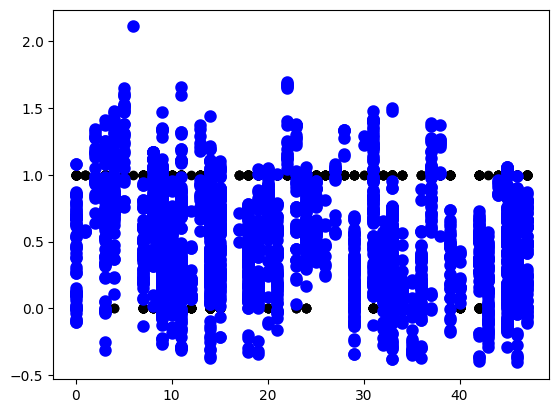

In [9]:
i=0 # номер измерения для построения
plt.scatter(X_test.iloc[:,i], y_test,  color='black')# строим желаемые выходы 
plt.scatter(X_test.iloc[:,i], y_predicted, color='blue', linewidth=3)# и рассчитанные

Не очень-то хорошее приближение.

Но вообще-то мы решаем задачу классификации, а не регрессии. Надо перевести выходы в номера классов. Для этого округлим значения выходов до ближайшего целого, если результат меньше 0, то установим 0, если больше 2, то установим 2. Сравним с указаниями учителя и посчитаем долю правильных (совпадающих) примеров. Найдем их долю.

Итак, хоть ошибка регрессии визуально большая, но для задачи классификации этих данных линейной регрессии достаточно. 

In [10]:
y_pred_class=np.rint(y_predicted)
y_pred_class[y_pred_class>1]=1
y_pred_class[y_pred_class<0]=0
y_pred_class=y_pred_class.astype('int')
score=np.sum(y_pred_class==y_test)/len(y_test)
score

0.8770101250744491

Линейная регрессия очень простая модель, может моделировать только линейные зависимости. Не устойчива к *выбросам* - данным, которые резко выбиваются из примерной зависимости остальных данных (например, из-за ошибки измерения). Попробуйте в предыдущих примерах обучить линейную регрессию, на тех же данных, что были в начале нашего урока (почти линейные) но один обучающий пример испортите - сделайте для него выход скажем равным 100. И попробуйте снова обучить модель.      

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

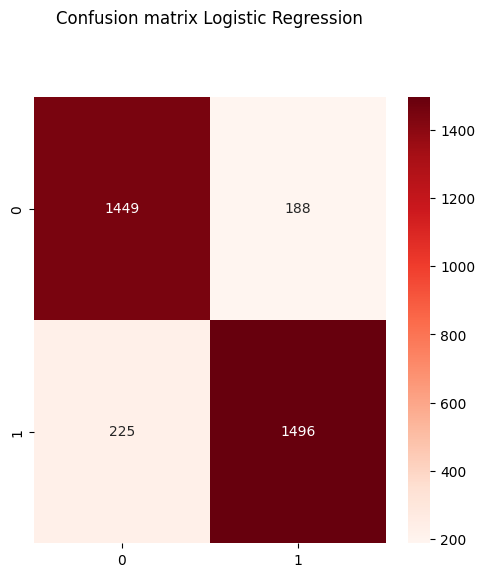

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y_pred_class)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [12]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

precision, recall, thresholds = roc_curve(y_test.ravel(), y_predicted.ravel())
precision, recall, thresholds

(array([0.        , 0.        , 0.        , ..., 0.92486255, 0.9260843 ,
        1.        ]),
 array([0.00000000e+00, 5.81057525e-04, 2.49854736e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([        inf,  2.11195667,  1.37860955, ..., -0.12216577,
        -0.12531418, -0.40498425]))

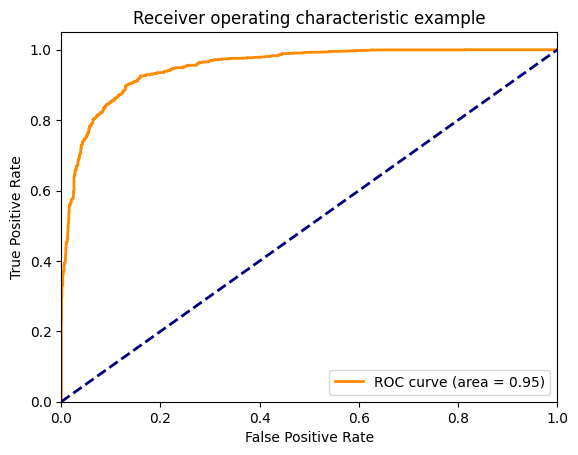

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# Логистическая регрессия
Логистическая регрессия похожа на линейную, но выход ее это не просто сумма произведений параметров и входов со смещением, а некоторая функция от этого. Применяют функцию под названием "сигмоида" или "логистическая функция", отсюда и название модели.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit # подключаем функцию из библиотеки

data = data_wine
X = data.drop('MSRP', axis=1)
y = data.MSRP
data

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Vehicle Style,highway MPG,city mpg,MSRP,Vehicle Size_Compact,...,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2,Number of Doors_3,Number of Doors_4
0,4,2011,8,0.334665,3,8,0.073446,0.138686,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,4,2011,8,0.299700,3,6,0.079096,0.138686,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4,2011,8,0.299700,3,8,0.079096,0.145985,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,2011,8,0.229770,3,8,0.079096,0.131387,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,4,2011,8,0.229770,3,6,0.079096,0.131387,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,0,2012,8,0.299700,3,2,0.064972,0.116788,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11187,0,2012,8,0.299700,3,2,0.064972,0.116788,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11188,0,2012,8,0.299700,3,2,0.064972,0.116788,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11189,0,2013,7,0.299700,3,2,0.064972,0.116788,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [16]:
from sklearn.linear_model import LogisticRegression
#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(X_train, y_train)
y_score=y_scor.predict(X_test)

C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn import metrics
# оценка точности модели
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2836
           1       0.77      0.78      0.77      2760

    accuracy                           0.77      5596
   macro avg       0.77      0.77      0.77      5596
weighted avg       0.77      0.77      0.77      5596



Глядя на отчет, кажется, что модель имеет очень низкую точность для большинства классов, а это означает, что она делает много ложноположительных прогнозов. Однако для некоторых классов он имеет высокую полноту, а это означает, что он правильно идентифицирует многие экземпляры в этих классах. В целом, оценки F1 очень низкие, что указывает на плохую производительность модели.

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

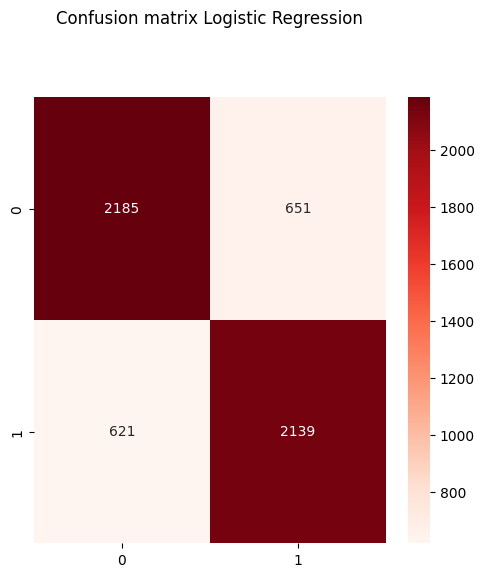

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

precision, recall, thresholds = roc_curve(y_test.ravel(), y_score.ravel())
precision, recall, thresholds

(array([0.        , 0.22954866, 1.        ]),
 array([0.   , 0.775, 1.   ]),
 array([inf,  1.,  0.]))

In [20]:
f1_score(y_test, y_score)

0.7708108108108108

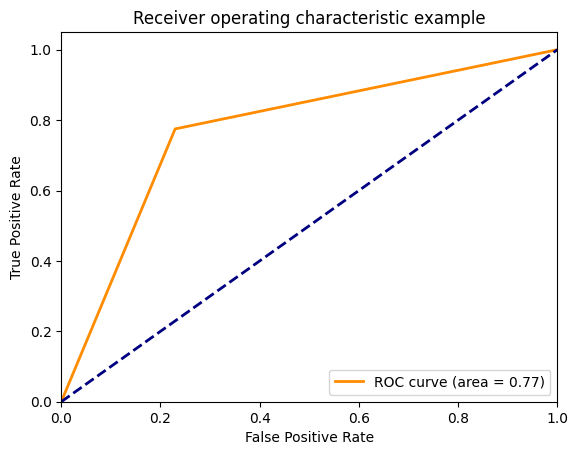

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


`penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’`
Используется для указания нормы, применяемой при наложении штрафов.

`dualbool, default=False`
Двойная или первичная формулировка.

`tolfloat, default=1e-4`
Допуск по критериям остановки.

`Cfloat, default=1.0`
Инверсия силы регуляризации; должно быть положительным числом с плавающей запятой. Как и в машинах опорных векторов, меньшие значения указывают на более сильную регуляризацию.

`fit_interceptbool, default=True`
Указывает, следует ли добавить константу (также известную как смещение или перехват) к функции принятия решения.

`solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’`

**Алгоритм для использования в задаче оптимизации.**

Для небольших наборов данных "`liblinear`" - хороший выбор, тогда как "sag" и "saga" быстрее для больших. 
Для мультиклассовых задач только `"newton-cg", "sag", "saga" и "lbfgs"` обрабатывают полиномиальные потери; «Liblinear» ограничивается схемами «один против остальных». 
`'newton-cg', 'lbfgs', 'sag' и 'saga'` обрабатывают L2 или отсутствие штрафа 
`'liblinear' и 'saga' `также обрабатывают штраф L1 
`'saga'` также поддерживает штраф 
`'elasticnet' 'liblinear' `не поддерживает штраф за установку = 'нет'

`max_iterint, default=100`
Максимальное количество итераций, необходимых для схождения классификатора.

## Домашнее задания

1. Загрузить выборку с сайта Kaggle.com.
2. Провести анализ полученной выборки.
3. Используя данные выборки обучить обыкновенную линейную регрессию и оценить качество построенной модели, основываясь на матрице неточности и ROC-анализе.
4. Используя данные выборки обучить логистическую регрессию и оценить качество построенной модели, основываясь на матрице неточности и ROC-анализе.
